# Thông tin sinh viên

- Họ tên: Vuong Ngoc Hue
- MSV:  21050051
- STT: 16

**Bài toán:**
* Tập dữ liệu `movies_metadata.csv` chứa thông tin của các bộ phim.
* Thực hiện quá trình thống kê mô tả sử dụng Python để tìm hiểu về dữ liệu
----------------------

### 1, (1 điểm) Đọc dữ liệu

Đọc file dữ liệu  và thực hiện các yêu cầu sau:

a. Hiển thị 4 dòng đầu tiên

b. Cho biết dữ liệu có kích thước bao nhiêu (bao nhiêu dòng, bao nhiêu cột)



In [2]:
import pandas as pd
df = pd.read_csv('movies_metadata.csv', encoding='latin-1')
df.head(4)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,10/30/1995,373554033,81,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,12/15/1995,262797249,104,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,12/22/1995,0,101,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,12/22/1995,81452156,127,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34


In [30]:
print("kich thuoc dong - cot",df.shape)


kich thuoc dong - cot (49, 26)


### 2, (1 điểm) Kiểm tra dữ liệu: đếm số lượng dữ liệu bị thiếu mỗi cột


In [4]:
print("du lieu bi thieu", df.isnull().sum())

du lieu bi thieu adult                     0
belongs_to_collection    39
budget                    0
genres                    0
homepage                 44
id                        0
imdb_id                   0
original_language         0
original_title            0
overview                  1
popularity                0
poster_path               0
production_companies      0
production_countries      0
release_date              0
revenue                   0
runtime                   0
spoken_languages          0
status                    0
tagline                   9
title                     0
video                     0
vote_average              0
vote_count                0
dtype: int64


### 3, (1 điểm) Cho biết có bao nhiêu phim sản xuất bằng tiếng Anh. Chiếm tỷ lệ bao nhiêu phần trăm


In [25]:
print("so phim san xuat bang tieng anh: ",df[df['original_language'] == 'en'].shape[0])

so phim san xuat bang tieng anh:  47


### 4, (2 điểm) Tính giá trị thống kê trung bình, trung vị độ lệch chuẩn hai thuộc tính

* Ngân sách (budget) 

* Doanh thu (revenue)

In [7]:
print("budget")
print("trung binh", df['budget'].mean())
print("trung vi: ", df['budget'].median())
print("do lech chuan: ", df['budget'].std())
print("revenue")
print("trung binh: ", df['revenue'].mean())
print("trung vi: ", df['revenue'].median())
print("do lech chuan: ", df['revenue'].std())


budget
trung binh 21547959.18367347
trung vi:  12000000.0
do lech chuan:  24334949.91601514
revenue
trung binh 77054396.71428572
trung vi:  23341568.0
do lech chuan:  109112022.9750135


### 5, (2 điểm) Liệt kê top 5 tên phim (title)

* 5 phim có ngân sách đầu tư (budget) nhiều nhất

* 5 phim có doanh thu cao nhất


In [19]:
# print("5 phim co ngan sach dau tu nhieu nhat\n", df.sort_values(by='budget', ascending=False).head(5))
print("5 phim co ngan sach dau tu nhieu nhat\n",df.nlargest(5, 'budget')[['title','budget']])

print("5 phim co doanh thu cao nhat\n",df.nlargest(5, 'revenue')[['title','revenue']])

5 phim co ngan sach dau tu nhieu nhat
                      title    budget
14        Cutthroat Island  98000000
1                  Jumanji  65000000
10  The American President  62000000
5 phim co doanh thu cao nhat
          title    revenue
0    Toy Story  373554033
9    GoldenEye  352194034
46  Pocahontas  346079773


### 6, (1 điểm) Liệt kê 5 phim có lợi nhuận cao nhất


In [22]:
df['loinhuan']= df['revenue'] - df['budget']
print("5 phim co loi nhuan cao nhat\n", df.nlargest(5, 'loinhuan')[['title','loinhuan' ]])

5 phim co loi nhuan cao nhat
          title   loinhuan
0    Toy Story  343554033
45       Se7en  294311859
9    GoldenEye  294194034
46  Pocahontas  291079773
32        Babe  224134910


### 7, (1 điểm) Vẽ đồ thị phân phối tần số về thời lượng của bộ phim (`runtime`)


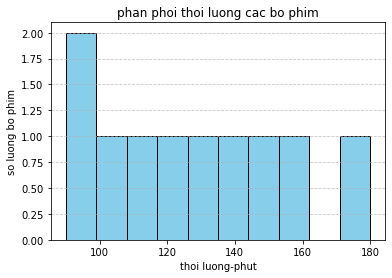

In [27]:
import matplotlib.pyplot as plt
import numpy as np
durations = [120, 90, 150, 105, 180, 95, 130, 110,160,140]
plt.hist(durations, bins=10, color='skyblue', edgecolor = 'black')
plt.title("phan phoi thoi luong cac bo phim")
plt.ylabel('so luong bo phim')
plt.xlabel('thoi luong-phut')
plt.grid(axis='y', linestyle ='--', alpha =0.7)
plt.show()

### 8, (1 điểm) Vẽ đồ thị boxplot về lợi nhuận. Dựa vào đồ thị trên bạn hãy cho nhận xét về lợi nhuận của phim `The American President`


In [28]:
import matplotlib.pyplot as plt
import numpy as np


---